<a href="https://colab.research.google.com/github/LanxyL/Capstone3---Recommendation-System/blob/main/Notebook/Recommendation_System_on_Amazon_home_kitchen_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#Read Kitchen&Dining Dataset from last notebook
KitchenDining = pd.read_csv('drive/My Drive/Recommendation_System/KitchenDining80000.csv')

In [4]:
# transform the ratings frame into a ratings matrix
ratings_mtx_df = KitchenDining.pivot_table(values='overall',
                                           index='reviewerID',
                                           columns='asin')
ratings_mtx_df.head(3)

asin,0912696591,B00000JGRP,B00000JGRQ,B00000JGRT,B00002N602,B00004OCIP,B00004OCIQ,B00004OCIU,B00004OCIX,B00004OCIZ,B00004OCJ6,B00004OCJ9,B00004OCJJ,B00004OCJK,B00004OCJN,B00004OCJO,B00004OCJQ,B00004OCJW,B00004OCK0,B00004OCK3,B00004OCKO,B00004OCKR,B00004OCKT,B00004OCL2,B00004OCL8,B00004OCL9,B00004OCLA,B00004OCLK,B00004OCLW,B00004OCM4,B00004OCMB,B00004OCMM,B00004OCMS,B00004OCMX,B00004OCMY,B00004OCNE,B00004OCNJ,B00004OCNK,B00004OCNL,B00004OCNQ,...,B00JW02L9W,B00JWXSPAS,B00JWY1PPE,B00JWYX7YQ,B00JWZCE08,B00JZKZPMO,B00JZL11V2,B00JZXYG9O,B00K11U0Y4,B00K4S1L1K,B00K4V4EWA,B00K6BCV7S,B00K7ILPYU,B00K7P0D9G,B00K8LHA3G,B00KAF5DLQ,B00KAJ3OY0,B00KAK443Y,B00KB7KNRM,B00KBQ1OHQ,B00KBUGQJS,B00KCFDB4U,B00KD83BMS,B00KDV5RZY,B00KFS40N0,B00KI2RQHU,B00KIVD1PC,B00KKYSBUW,B00KM9W2PU,B00KNPVL8W,B00KQCJ0CG,B00KQXDIG4,B00KSRQN0Q,B00KSRSZC0,B00KSRV3UQ,B00KSRXUC0,B00KW1ZDCM,B00KWKQ2MS,B00L8FQZ3M,B00LB18EKK
reviewerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00473363TJ8YSZ3YAGG9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00593903MCE5GXTAGGNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A037357115LCU92V2R0YR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KitchenDining, test_size=0.2)

In [6]:
print(train.shape)
print(test.shape)
print(KitchenDining.shape)

(65558, 24)
(16390, 24)
(81948, 24)


In [58]:
# transform the train ratings frame into a ratings matrix
train_sparse = train.pivot_table(values='overall',
                                 index='reviewerID',
                                 columns='asin')
train_sparse.head(3)

asin,0912696591,B00000JGRP,B00000JGRQ,B00000JGRT,B00002N602,B00004OCIP,B00004OCIQ,B00004OCIU,B00004OCIX,B00004OCIZ,B00004OCJ6,B00004OCJ9,B00004OCJJ,B00004OCJK,B00004OCJN,B00004OCJO,B00004OCJQ,B00004OCJW,B00004OCK0,B00004OCK3,B00004OCKO,B00004OCKR,B00004OCKT,B00004OCL2,B00004OCL8,B00004OCL9,B00004OCLA,B00004OCLK,B00004OCLW,B00004OCM4,B00004OCMB,B00004OCMM,B00004OCMS,B00004OCMX,B00004OCMY,B00004OCNE,B00004OCNJ,B00004OCNK,B00004OCNL,B00004OCNQ,...,B00JW02L9W,B00JWXSPAS,B00JWY1PPE,B00JWYX7YQ,B00JWZCE08,B00JZKZPMO,B00JZL11V2,B00JZXYG9O,B00K11U0Y4,B00K4S1L1K,B00K4V4EWA,B00K6BCV7S,B00K7ILPYU,B00K7P0D9G,B00K8LHA3G,B00KAF5DLQ,B00KAJ3OY0,B00KAK443Y,B00KB7KNRM,B00KBQ1OHQ,B00KBUGQJS,B00KCFDB4U,B00KD83BMS,B00KDV5RZY,B00KFS40N0,B00KI2RQHU,B00KIVD1PC,B00KKYSBUW,B00KM9W2PU,B00KNPVL8W,B00KQCJ0CG,B00KQXDIG4,B00KSRQN0Q,B00KSRSZC0,B00KSRV3UQ,B00KSRXUC0,B00KW1ZDCM,B00KWKQ2MS,B00L8FQZ3M,B00LB18EKK
reviewerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00473363TJ8YSZ3YAGG9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00593903MCE5GXTAGGNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A037357115LCU92V2R0YR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# transform the test ratings frame into a ratings matrix
test_sparse = test.pivot_table(values='overall',
                               index='reviewerID',
                               columns='asin')
test_sparse.head(3)

asin,0912696591,B00000JGRP,B00000JGRQ,B00000JGRT,B00002N602,B00004OCIP,B00004OCIQ,B00004OCIU,B00004OCIX,B00004OCIZ,B00004OCJ6,B00004OCJ9,B00004OCJJ,B00004OCJK,B00004OCJN,B00004OCJO,B00004OCJQ,B00004OCJW,B00004OCK0,B00004OCK3,B00004OCKO,B00004OCKR,B00004OCKT,B00004OCL2,B00004OCL8,B00004OCL9,B00004OCLA,B00004OCLK,B00004OCLW,B00004OCM4,B00004OCMB,B00004OCMM,B00004OCMS,B00004OCMX,B00004OCMY,B00004OCNE,B00004OCNJ,B00004OCNK,B00004OCNL,B00004OCNQ,...,B00JW02L9W,B00JWXSPAS,B00JWY1PPE,B00JWYX7YQ,B00JWZCE08,B00JZKZPMO,B00JZL11V2,B00JZXYG9O,B00K11U0Y4,B00K4S1L1K,B00K4V4EWA,B00K6BCV7S,B00K7ILPYU,B00K7P0D9G,B00K8LHA3G,B00KAF5DLQ,B00KAJ3OY0,B00KAK443Y,B00KB7KNRM,B00KBQ1OHQ,B00KBUGQJS,B00KCFDB4U,B00KD83BMS,B00KDV5RZY,B00KFS40N0,B00KI2RQHU,B00KIVD1PC,B00KKYSBUW,B00KM9W2PU,B00KNPVL8W,B00KQCJ0CG,B00KQXDIG4,B00KSRQN0Q,B00KSRSZC0,B00KSRV3UQ,B00KSRXUC0,B00KW1ZDCM,B00KWKQ2MS,B00L8FQZ3M,B00LB18EKK
reviewerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A00473363TJ8YSZ3YAGG9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A00593903MCE5GXTAGGNL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A037357115LCU92V2R0YR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Finding Global Average of all item ratings from sampled train dataset
print("Global average of all products raview ratings in Train Sample is {}".format(np.round(train.overall.mean(), 2)))

Global average of all products raview ratings in Train Sample is 4.41


In [42]:
train_sparse = sparse.csr_matrix(np.nan_to_num(train_sparse.values))
test_sparse = sparse.csr_matrix(np.nan_to_num(test_sparse.values))

In [63]:
print("Sparsity Of Train matrix : {}% ".format((train_sparse.isna().sum().sum()/(train_sparse.shape[1]*train_sparse.shape[0])*100)))

Sparsity Of Train matrix : 99.80447630500241% 


In [64]:
print("Sparsity Of Test matrix : {}% ".format((test_sparse.isna().sum().sum()/(test_sparse.shape[1]*test_sparse.shape[0])*100)))

Sparsity Of Test matrix : 99.93224333992131% 


In [70]:
def getAverageUserRatings(df, userid):
    return df.loc[userid, :].mean()

In [71]:
def getAverageItemRatings(df, itemid):
    return df.loc[:, itemid].mean()

In [73]:
def num_users_rate(df, itemid):
  return df.loc[:, itemid].count()

In [76]:
train_surprice = train[['reviewerID', 'asin', 'overall', 'price', 'year', 'month', 'reviewlength']]
train_surprice.head()

,reviewerID,asin,overall,price,year,month,reviewlength
12925,A3OPKFBT8Z15TE,B00009WE3Y,5.0,15.00,2013,7,103
37924,A78VQHFWZ5KH9,B000TTCK64,5.0,77.37,2010,3,87
50072,A1HN7OLEVRJ7DD,B002FYS5BA,5.0,199.00,2014,5,28
22328,A1WI176M51EBIT,B00063QPYQ,5.0,10.64,2013,5,37
72496,A2FQIGXDVEW10B,B009L16ZBM,5.0,108.95,2014,5,143


In [78]:
train_surprice['user_avg'] = train_surprice['reviewerID'].apply(lambda x: getAverageUserRatings(train_sparse, x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
train_surprice['item_avg'] = train_surprice['asin'].apply(lambda x: getAverageItemRatings(train_sparse, x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
train_surprice.head()

,reviewerID,asin,overall,price,year,month,reviewlength,user_avg,item_avg
12925,A3OPKFBT8Z15TE,B00009WE3Y,5.0,15.00,2013,7,103,3.000000,4.736842
37924,A78VQHFWZ5KH9,B000TTCK64,5.0,77.37,2010,3,87,4.857143,4.727273
50072,A1HN7OLEVRJ7DD,B002FYS5BA,5.0,199.00,2014,5,28,4.571429,4.916667
22328,A1WI176M51EBIT,B00063QPYQ,5.0,10.64,2013,5,37,4.692308,4.625000
72496,A2FQIGXDVEW10B,B009L16ZBM,5.0,108.95,2014,5,143,5.000000,4.500000


In [104]:
test_surprice = test[['reviewerID', 'asin', 'overall', 'price', 'year', 'month', 'reviewlength']]
test_surprice['user_avg'] = test_surprice['reviewerID'].apply(lambda x: getAverageUserRatings(test_sparse, x))
test_surprice['item_avg'] = test_surprice['asin'].apply(lambda x: getAverageItemRatings(test_sparse, x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
getAverageUserRatings(train_sparse, 'A78VQHFWZ5KH9')

4.857142857142857

In [72]:
train_sparse.loc[:,'B00000JGRP'].count()

26

In [45]:
AvgRatingUser = getAverageRatings(train_sparse, True)

In [46]:
print("Average rating of user 25 = {}".format(AvgRatingUser[25]))

Average rating of user 25 = 4.785714285714286


In [47]:
AvgRatingItem = getAverageRatings(train_sparse, False)
print("Average rating of item 25 = {}".format(AvgRatingItem[25]))

Average rating of item 25 = 4.466666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


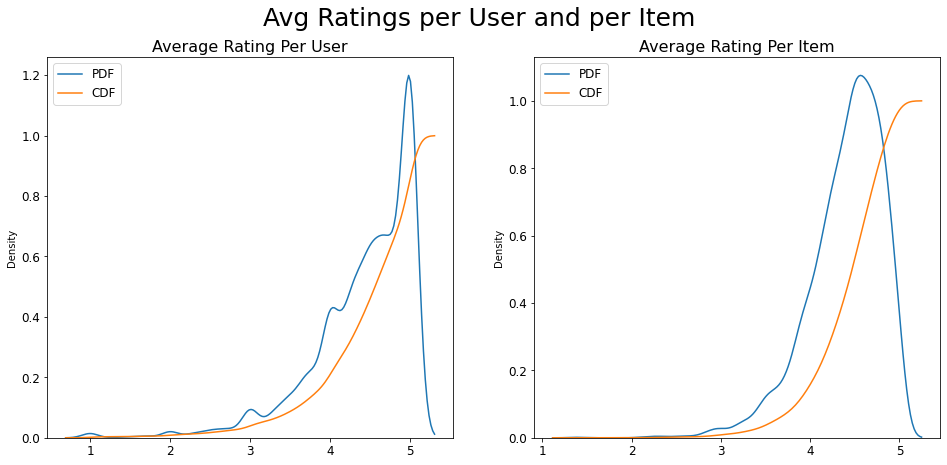

In [52]:
fig, axes = plt.subplots(1,2, figsize = (16, 7))
fig.suptitle('Avg Ratings per User and per Item', fontsize=25)

user_average = [rats for rats in AvgRatingUser.values()]
sns.distplot(user_average, hist = False, ax = axes[0], label = "PDF")
sns.kdeplot(user_average, cumulative = True, ax = axes[0], label = "CDF")
axes[0].set_title("Average Rating Per User", fontsize=16)
axes[0].tick_params(labelsize = 12)
axes[0].legend(loc='upper left', fontsize = 12)

item_average = [ratm for ratm in AvgRatingItem.values()]
sns.distplot(item_average, hist = False, ax = axes[1], label = "PDF")
sns.kdeplot(item_average, cumulative = True, ax = axes[1], label = "CDF")
axes[1].set_title("Average Rating Per Item", fontsize=16)
axes[1].tick_params(labelsize = 12)
axes[1].legend(loc='upper left', fontsize = 12)

plt.show()

In [7]:
def evaluate(estimate_f):
  """ RMSE-based predictive performance evaluation with pandas. """
  ids_to_estimate = zip(test.reviewerID, test.asin) 
  estimated = np.array([estimate_f(u,i) for (u,i) in ids_to_estimate])
  real = test.overall.values
  return np.sqrt(mean_squared_error(real, estimated))

In [8]:
#Predict all reviews as 5 star and see how accurate it would be
def simple_estimate_function(user_id, item_id): return 5

In [9]:
print('RMSE for simple estimate function: %s' % evaluate(simple_estimate_function))

RMSE for simple estimate function: 1.1631152547319272


Since we already know that most of the people rate 5 on the review. Let us set this estimation function as a threshold. A better model shall have a much smaller RMSE.

In [10]:
def content_mean(user_id, item_id):
  """ Simple content-filtering based on mean ratings. """
  if user_id in train.reviewerID.to_list():
    user_condition = train.reviewerID == user_id
    return train.loc[user_condition, 'overall'].mean()
  else:
    return 5
print('RMSE for content mean estimation: %s' % evaluate(content_mean))

RMSE for content mean estimation: 1.0282606517284605


In [11]:
def collaborative_mean(user_id, item_id):
  """ Simple collaborative-filtering based on mean ratings. """
  if item_id in train.asin.to_list():
    item_condition = train.asin == item_id
    return train.loc[item_condition, 'overall'].mean()
  else:
    return 5
print('RMSE for collaborative mean estimation: %s' % evaluate(collaborative_mean))

RMSE for collaborative mean estimation: 0.9781251753594314


In [12]:
KitchenDining.head()

,Unnamed: 0,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,salesRank,title,description,related,price,brand,year,month,reviewlength,mainCategory,subCategory1,subCategory2,subCategory3,subCategory4,subCategory5,subCategory6#
0,315,A39RRTO760KGOY,0912696591,"[0, 0]","had no idea about decorating cakes,by this boo...",5.0,follow the instructions,2012-05-27,{'Kitchen & Dining': 9690},Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,2012,5,56,Home & Kitchen,Kitchen & Dining,Bakeware,Baking & Cookie Sheets,NaN,NaN,NaN
1,317,AZF13R8HNB59E,0912696591,"[0, 1]","excellent book, shipped on time, packaged nice...",5.0,book,2012-06-12,{'Kitchen & Dining': 9690},Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,2012,6,24,Home & Kitchen,Kitchen & Dining,Bakeware,Baking & Cookie Sheets,NaN,NaN,NaN
2,318,A1KCBA3PKLV2IT,0912696591,"[0, 0]",i loved it. don't use it much but when i had i...,5.0,great!,2012-12-26,{'Kitchen & Dining': 9690},Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,2012,12,27,Home & Kitchen,Kitchen & Dining,Bakeware,Baking & Cookie Sheets,NaN,NaN,NaN
3,321,A3JM7FVJMPJ1XD,0912696591,"[4, 4]",So I actually bought this thinking it was the ...,3.0,Good for what it's worth,2012-08-16,{'Kitchen & Dining': 9690},Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,2012,8,92,Home & Kitchen,Kitchen & Dining,Bakeware,Baking & Cookie Sheets,NaN,NaN,NaN
4,326,A1B9BZ3AJ5V1NJ,0912696591,"[0, 0]",I'm hoping that I can learn how to make gum pa...,5.0,learning,2014-05-21,{'Kitchen & Dining': 9690},Wilton Decorating Cakes Book,This exciting book presents what Wilton has l...,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '...",14.26,Wilton,2014,5,24,Home & Kitchen,Kitchen & Dining,Bakeware,Baking & Cookie Sheets,NaN,NaN,NaN


In [13]:
import json
product_related = []
for i in range(KitchenDining.shape[0]):
  product_related.append([KitchenDining.asin[i],KitchenDining.related[i]])
product_related = pd.DataFrame(product_related)
product_related = product_related.rename(columns={0:'asin', 1:'related'})
product_related.dropna(inplace=True)
product_related.drop_duplicates(inplace=True)
product_related.reset_index()
product_related.head()

,asin,related
0,0912696591,"{'also_bought': ['B003MC22TU', 'B003MC22PY', '..."
41,B00000JGRP,"{'also_viewed': ['B0000645YL', 'B0000645YM', '..."
68,B00000JGRQ,"{'also_bought': ['B00004S9CJ', 'B001D9B2R2', '..."
80,B00000JGRT,"{'also_bought': ['B00004S9D3', '0894803123', '..."
152,B00002N602,"{'also_bought': ['B000ORD8GM', '0965410803', '..."


In [14]:
product_related.shape

(3320, 2)

In [15]:
relation_dict = dict()
for i in product_related.index:
  x=product_related.related[i]
  x = str(x).replace("\'", "\"")
  dictx = json.loads(x)
  relation_dict[product_related.asin[i]] = dictx


In [16]:
product_related = pd.DataFrame(relation_dict)

In [17]:
product_related

,0912696591,B00000JGRP,B00000JGRQ,B00000JGRT,B00002N602,B00004OCIP,B00004OCIQ,B00004OCIU,B00004OCIX,B00004OCIZ,B00004OCJ6,B00004OCJ9,B00004OCJJ,B00004OCJK,B00004OCJN,B00004OCJO,B00004OCJQ,B00004OCJW,B00004OCK0,B00004OCK3,B00004OCKO,B00004OCKR,B00004OCKT,B00004OCL2,B00004OCL8,B00004OCL9,B00004OCLA,B00004OCLK,B00004OCLW,B00004OCM4,B00004OCMB,B00004OCMM,B00004OCMS,B00004OCMX,B00004OCMY,B00004OCNE,B00004OCNJ,B00004OCNK,B00004OCNL,B00004OCNQ,...,B00JW02L9W,B00JWXSPAS,B00JWY1PPE,B00JWYX7YQ,B00JWZCE08,B00JZKZPMO,B00JZL11V2,B00JZXYG9O,B00K11U0Y4,B00K4S1L1K,B00K4V4EWA,B00K6BCV7S,B00K7ILPYU,B00K7P0D9G,B00K8LHA3G,B00KAF5DLQ,B00KAJ3OY0,B00KAK443Y,B00KB7KNRM,B00KBQ1OHQ,B00KBUGQJS,B00KCFDB4U,B00KD83BMS,B00KDV5RZY,B00KFS40N0,B00KI2RQHU,B00KIVD1PC,B00KKYSBUW,B00KM9W2PU,B00KNPVL8W,B00KQCJ0CG,B00KQXDIG4,B00KSRQN0Q,B00KSRSZC0,B00KSRV3UQ,B00KSRXUC0,B00KW1ZDCM,B00KWKQ2MS,B00L8FQZ3M,B00LB18EKK
also_bought,"[B003MC22TU, B003MC22PY, B006UKNSVC, B003MC22Z...",NaN,"[B00004S9CJ, B001D9B2R2, B000TQEDDK, B00005QFK...","[B00004S9D3, 0894803123, 149484205X, 158008219...","[B000ORD8GM, 0965410803, 0764597264, B0000Z6JI...","[B000SSTV8Q, B0071OUJDQ, B00004OCO8, B0001YH1A...","[B00004OCM4, B007WTGR90, B000SOAT0Y, B002XOHZW...","[B00004OCIP, B000Q9CIYG, B0000DAQ93, B000VQOP5...",NaN,"[B00004OCLJ, B00004OCL2, B003M8GMS6, B00004OCL...","[B000A13OEI, B001BB2LMM, B0011EZ7AC, B000A13OE...","[B00421ATIQ, B000FUO3QM, B002CZOSL8, B0037XIZD...","[B00004OCJK, B00004OCIP, B004VLYQGS, B000YDO2M...","[B00004OCIP, B00004OCNS, B00004OCJJ, B0000CDVD...","[B003BEDQL2, B0000E1FDA, B0000D8CAO, B00004OCI...","[B0000DAQ93, B0036X4YOG, B00B6LUAPW, B003AIKP0...","[B0019R7SPS, B00004OCNJ, B007L5ROZQ, B000I0MGK...","[B00004OCIP, B00006IFN8, B00004OCJG, B0001YH1A...","[B0000CDVD8, B0001BMXIU, B00004OCMX, B003L0OYJ...","[B0002YTG5Y, B0002YTG4K, B0002YTG3G, B0007P4J3...","[B0007VO0EE, B0001YH1A2, B001713L5C, B00004OCI...","[B002MQ3SOA, B002DWA6K2, B000OUY2QO, B003L0OOR...","[B000AREB5S, B0088LR592, B002XOHZWC, B007WTGR9...","[B00004OCIZ, B00004OCLJ, B001CRC54O, B001OHV29...","[B00004OCOP, B000KEYD9K, B00004OCOQ, B00004OCO...","[B00004OCNS, B00004OCJK, B0045EPNBI, B00004OCI...","[B007U256D2, B0042FN98Y, B0010L1C28, B0038JE5Y...","[B002HMBVKW, B00004OCIZ, B00004OCLJ, B000FEDCN...","[B001713L84, B00KY4Z1I8, B001CDLKHQ, B00004OCN...","[B00CPNUY7Y, B002XOHZWC, B00004OCIQ, B00095VK7...","[B00004OCMX, B000EURKG8, B0069KDUXO, B00004OCM...","[B0001YH1A2, B00004OCIP, B0000DAQ46, B0007VO0C...","[B00004OCMT, B00004OCME, B00004OCMW, B00004OCM...","[B00004OCMB, B00004OCMP, B0001BMXIU, B00004OCM...","[B001CDP5VS, B000M8YMEU, B00004OCO6, B00004OCO...","[B000QJGRJ8, B007638GOQ, B00A2KDAJQ, B0006Z16R...","[B000QJE48O, B000IYYFIQ, B000KEUKO2, B000JPSI8...","[B000VWECPQ, B000MMRNPG, B00004OCNJ, B000QJE48...","[B000QJE48O, B00004OCNJ, B00005OAXZ, B00004OCN...","[B00004OCNS, B00004OCNT, B00004OCO8, B000JPSI8...",...,"[B00JJOEV9Y, B00M04HZIO, B00L8FDIZU, B00L8FQZ3...","[B00JWYX7YQ, B00JJOEV9Y, B00LGVUUA2, B00L8HA5L...","[B00JJOEV9Y, B00LGVUUA2, B00M04HZIO, B00L8HA5L...","[B00JJOEV9Y, B00JWXSPAS, B00LGVUUA2, B00M04HZI...","[B00JJOEV9Y, B00L8FDIZU, B00L8FQZ3M, B00LGVUUA...","[B00J4FUCAA, B00K8LHA3G, B00HDABAQS, B0000CFOI...","[B00JVOIW3S, B00J93MQ6U, B00DDMILGM, B001OAKME...","[B00JJOEV9Y, B00M04HZIO, B00LGVUUA2, B00L8FDIZ...","[B00D19SSE2, B005TA1IUW, B0041ENPEO, B00D1AXYA...","[B00JJOEV9Y, B00L9KOZBK, B00M04HZIO, B00LSXYC6...","[B00JS0TIVK, B00I3LDJJW, B005OLJEZC, B000QIU7X...","[B00K6BCW5O, B00KNPVL8W, B004ZEMSCK, B00DOL3LW...","[B00KZNOHTW, B00KQBR9FM, B00KQVTX06, B00KHGIK5...","[B00KCFDB4U, B00K8LHA3G, B00JVOIW3S, B00KWXBZP...","[B00K7P0D9G, B00KCFDB4U, B00JZKZPMO, B00JVOIW3...","[B00006IV0U, B003GSKQAW, B006OK7RRO, B00GOPICN...",NaN,NaN,NaN,"[B00K7P0D9G, B00KCFDB4U, B001T4URXG, B0052456U...",NaN,"[B00K7P0D9G, B00EZQ8OXU, B00KL1JZEU, B00KTV6DY...","[B00J4FUCAA, B00J3M78GA, B00KDV5RZY, B00HDABAQ...","[B00J4FUCAA, B00J3M78GA, B00KDUYU30, B00HDABAQ...","[B00JJOEV9Y, B00M04HZIO, B00KWP8ZIM, B00KVE7R0...","[B00JJ

In [18]:
def get_mean_rating(items):
  if train['asin'].isin(items).sum() != 0:
    return train[train['asin'].isin(items)].overall.mean()
  else:
    return 0

In [19]:
def collaborative_related(user_id, item_id):
  """ collaborative-filtering based on mean ratings of related products. """
  if item_id in train.asin.to_list():
    item_condition = train.asin == item_id
    if item_id in product_related.columns:
      related_items_bought = product_related.loc['also_bought', item_id]
      if type(related_items_bought) is list:
        mean_rate = get_mean_rating(related_items_bought)
        if mean_rate == 0:
          return train.loc[item_condition, 'overall'].mean()
        else:
          return mean_rate*0.5+train.loc[item_condition, 'overall'].mean()*0.5
      else:
        return train.loc[item_condition, 'overall'].mean()
    else:
      return train.loc[item_condition, 'overall'].mean()
  else:
    return 5
print('RMSE for collaborative related mean estimation: %s' % evaluate(collaborative_related))

RMSE for collaborative related mean estimation: 0.9697239695245722


##Model with Surprise library

In [89]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619424 sha256=9175d801ae48dd0aa918c6e6f11b20c1fb698a0e67219356dbb8e9d3ae53c07e
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [90]:
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [91]:
train[['reviewerID', 'asin', 'overall']].head(5)

,reviewerID,asin,overall
12925,A3OPKFBT8Z15TE,B00009WE3Y,5.0
37924,A78VQHFWZ5KH9,B000TTCK64,5.0
50072,A1HN7OLEVRJ7DD,B002FYS5BA,5.0
22328,A1WI176M51EBIT,B00063QPYQ,5.0
72496,A2FQIGXDVEW10B,B009L16ZBM,5.0


In [92]:
#Transforming train data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train[['reviewerID', 'asin', 'overall']], reader)
trainset = data.build_full_trainset()

In [93]:
#Transforming test data
testset = list(zip(test["reviewerID"].values, test["asin"].values, test["overall"].values))

In [94]:
testset[:5]

[('A38Z8ZXX1BPFRL', 'B000B6NXL6', 5.0),
 ('ANQQ6LF20ZTVD', 'B0046EC1D0', 4.0),
 ('A1UQBFCERIP7VJ', 'B00J3M78GA', 5.0),
 ('A2YS0XIQ844GFF', 'B0051XZAA6', 5.0),
 ('A7P7OP5UW6APV', 'B001EU9VSM', 5.0)]

In [95]:
error_table = pd.DataFrame(columns = ["Model", "Train RMSE", "Test RMSE"])
model_train_evaluation = dict()
model_test_evaluation = dict()

In [96]:
def make_table(model_name, rmse_train, rmse_test):
    global error_table
    #All variable assignments in a function store the value in the local symbol table; whereas variable references first look 
    #in the local symbol table, then in the global symbol table, and then in the table of built-in names. Thus, global variables 
    #cannot be directly assigned a value within a function (unless named in a global statement), 
    #although they may be referenced.
    error_table = error_table.append(pd.DataFrame([[model_name, rmse_train, rmse_test]], columns = ["Model", "Train RMSE", "Test RMSE"]))
    error_table.reset_index(drop = True, inplace = True)

In [97]:
def error_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [98]:
import xgboost as xgb
from datetime import datetime
def train_test_xgboost(x_train, x_test, y_train, y_test, model_name):
    startTime = datetime.now()
    train_result = dict()
    test_result = dict()
    
    clf = xgb.XGBRegressor(n_estimators = 100, silent = False, n_jobs  = 10)
    clf.fit(x_train, y_train)
    
    print("-"*50)
    print("TRAIN DATA")
    y_pred_train = clf.predict(x_train)
    rmse_train = error_metrics(y_train, y_pred_train)
    print("RMSE = {}".format(rmse_train))
    print("-"*50)
    train_result = {"RMSE": rmse_train, "Prediction": y_pred_train}
    
    print("TEST DATA")
    y_pred_test = clf.predict(x_test)
    rmse_test = error_metrics(y_test, y_pred_test)
    print("RMSE = {}".format(rmse_test))
    print("-"*50)
    test_result = {"RMSE": rmse_test, "Prediction": y_pred_test}
        
    print("Time Taken = "+str(datetime.now() - startTime))
    
    plot_importance(xgb, clf)
    
    make_table(model_name, rmse_train, rmse_test)
    
    return train_result, test_result

In [99]:
def plot_importance(model, clf):
    fig = plt.figure(figsize = (8, 6))
    ax = fig.add_axes([0,0,1,1])
    model.plot_importance(clf, ax = ax, height = 0.3)
    plt.xlabel("F Score", fontsize = 20)
    plt.ylabel("Features", fontsize = 20)
    plt.title("Feature Importance", fontsize = 20)
    plt.tick_params(labelsize = 15)
    
    plt.show()

In [100]:
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    predicted = np.array([pred.est for pred in predictions])
    return actual, predicted

In [101]:
def get_error(predictions):
    actual, predicted = get_ratings(predictions)
    rmse = np.sqrt(mean_squared_error(actual, predicted)) 
    return rmse

In [102]:
def run_surprise(algo, trainset, testset, model_name):
    startTime = datetime.now()
    
    train = dict()
    test = dict()
    
    algo.fit(trainset)
    
#-----------------Evaluating Train Data------------------#
    print("-"*50)
    print("TRAIN DATA")
    train_pred = algo.test(trainset.build_testset())
    #You can check out "algo.test()" function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in 
    #"Train-test split and the fit() method" section
    #You can check out "trainset.build_testset()" function at "https://surprise.readthedocs.io/en/stable/FAQ.html#can-i-use-my-own-dataset-with-surprise-and-can-it-be-a-pandas-dataframe" in 
    #"How to get accuracy measures on the training set" section
    train_actual, train_predicted = get_ratings(train_pred)
    train_rmse = get_error(train_pred)
    print("RMSE = {}".format(train_rmse))
    print("-"*50)
    train = {"RMSE": train_rmse, "Prediction": train_predicted}
    
#-----------------Evaluating Test Data------------------#
    print("TEST DATA")
    test_pred = algo.test(testset)
    #You can check out "algo.test()" function at "https://surprise.readthedocs.io/en/stable/getting_started.html" in 
    #"Train-test split and the fit() method" section
    test_actual, test_predicted = get_ratings(test_pred)
    test_rmse = get_error(test_pred)
    print("RMSE = {}".format(test_rmse))
    print("-"*50)
    test = {"RMSE": test_rmse, "Prediction": test_predicted}
    
    print("Time Taken = "+str(datetime.now() - startTime))
    
    make_table(model_name, train_rmse, test_rmse)
    
    return train, test

### XGBoost 13 Features

[09:25:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--------------------------------------------------
TRAIN DATA
RMSE = 0.7805147479596821
--------------------------------------------------
TEST DATA
RMSE = 0.5868163765744207
--------------------------------------------------
Time Taken = 0:00:02.999142


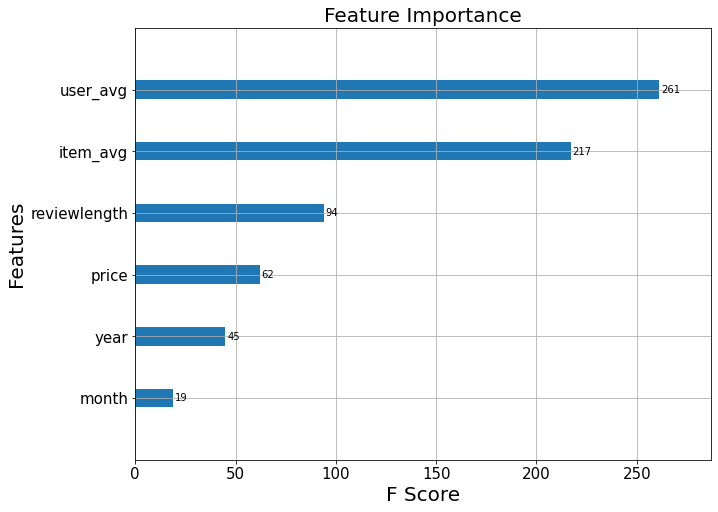

In [105]:
x_train = train_surprice.drop(["reviewerID", "asin", "overall"], axis = 1)

x_test = test_surprice.drop(["reviewerID", "asin", "overall"], axis = 1)

y_train = train_surprice["overall"]

y_test = test_surprice["overall"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGBoost_13")

model_train_evaluation["XGBoost_13"] = train_result
model_test_evaluation["XGBoost_13"] = test_result

### Surprise BaselineOnly Model

In [106]:
bsl_options = {"method":"sgd", "learning_rate":0.01, "n_epochs":25}

algo = BaselineOnly(bsl_options=bsl_options)
#You can check the docs of above used functions at:https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baseline-estimates-configuration
#at section "Baselines estimates configuration".

train_result, test_result = run_surprise(algo, trainset, testset, "BaselineOnly")

model_train_evaluation["BaselineOnly"] = train_result
model_test_evaluation["BaselineOnly"] = test_result

Estimating biases using sgd...
--------------------------------------------------
TRAIN DATA
RMSE = 0.8029107448246685
--------------------------------------------------
TEST DATA
RMSE = 0.9486086555670796
--------------------------------------------------
Time Taken = 0:00:01.800340


### XGBoost 13 Features + Suprise BaselineOnly Model

In [107]:
train_surprice['BaselineOnly'] = model_train_evaluation['BaselineOnly']['Prediction']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
train_surprice.head()

,reviewerID,asin,overall,price,year,month,reviewlength,user_avg,item_avg,BaselineOnly
12925,A3OPKFBT8Z15TE,B00009WE3Y,5.0,15.00,2013,7,103,3.000000,4.736842,3.623450
37924,A78VQHFWZ5KH9,B000TTCK64,5.0,77.37,2010,3,87,4.857143,4.727273,3.403570
50072,A1HN7OLEVRJ7DD,B002FYS5BA,5.0,199.00,2014,5,28,4.571429,4.916667,3.602041
22328,A1WI176M51EBIT,B00063QPYQ,5.0,10.64,2013,5,37,4.692308,4.625000,3.337543
72496,A2FQIGXDVEW10B,B009L16ZBM,5.0,108.95,2014,5,143,5.000000,4.500000,3.345735


In [115]:
test_surprice['BaselineOnly'] = model_test_evaluation['BaselineOnly']['Prediction']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[09:34:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--------------------------------------------------
TRAIN DATA
RMSE = 0.7773710329781653
--------------------------------------------------
TEST DATA
RMSE = 0.5872139498425167
--------------------------------------------------
Time Taken = 0:00:02.970408


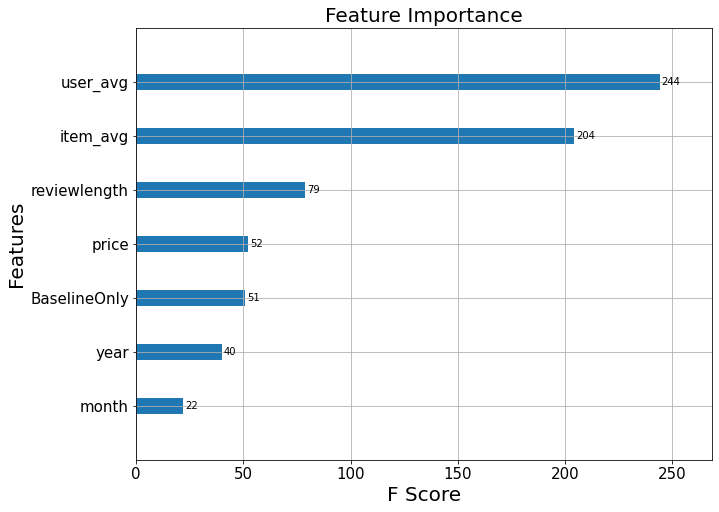

In [119]:
x_train = train_surprice.dropna().drop(["reviewerID", "asin", "overall"], axis = 1)

x_test = test_surprice.dropna().drop(["reviewerID", "asin", "overall"], axis = 1)

y_train = train_surprice.dropna().overall

y_test = test_surprice.dropna().overall

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL")

model_train_evaluation["XGB_BSL"] = train_result
model_test_evaluation["XGB_BSL"] = test_result

### Surprise KNN-Baseline with User-User.

In [120]:
param_grid  = {'sim_options':{'name': ["pearson_baseline"], "user_based": [True], "min_support": [2], "shrinkage": [60, 80, 80, 140]}, 'k': [5, 20, 40, 80]}

gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [121]:
sim_options = {'name':'pearson_baseline', 'user_based':True, 'min_support':2, 'shrinkage':gs.best_params['rmse']['sim_options']['shrinkage']}

bsl_options = {'method': 'sgd'} 

algo = KNNBaseline(k = gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options=bsl_options)

train_result, test_result = run_surprise(algo, trainset, testset, "KNNBaseline_User")

model_train_evaluation["KNNBaseline_User"] = train_result
model_test_evaluation["KNNBaseline_User"] = test_result

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
--------------------------------------------------
TRAIN DATA
RMSE = 0.015633581140641145
--------------------------------------------------
TEST DATA
RMSE = 0.9659061787880306
--------------------------------------------------
Time Taken = 0:00:14.899956


### Surprise KNN-Baseline with Item-Item

In [122]:
param_grid  = {'sim_options':{'name': ["pearson_baseline"], "user_based": [False], "min_support": [2], "shrinkage": [60, 80, 80, 140]}, 'k': [5, 20, 40, 80]}

gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [123]:
sim_options = {'name':'pearson_baseline', 'user_based':False, 'min_support':2, 'shrinkage':gs.best_params['rmse']['sim_options']['shrinkage']}

bsl_options = {'method': 'sgd'} 

algo = KNNBaseline(k = gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options=bsl_options)

train_result, test_result = run_surprise(algo, trainset, testset, "KNNBaseline_Item")

model_train_evaluation["KNNBaseline_Item"] = train_result
model_test_evaluation["KNNBaseline_Item"] = test_result

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
--------------------------------------------------
TRAIN DATA
RMSE = 0.015297403355720636
--------------------------------------------------
TEST DATA
RMSE = 0.9809683565050931
--------------------------------------------------
Time Taken = 0:00:04.189379


### XGBoost 13 Features + Surprise BaselineOnly + Surprice KNN Baseline

In [124]:
train_surprice["KNNBaseline_User"] = model_train_evaluation["KNNBaseline_User"]["Prediction"]
train_surprice["KNNBaseline_Item"] = model_train_evaluation["KNNBaseline_Item"]["Prediction"]

test_surprice["KNNBaseline_User"] = model_test_evaluation["KNNBaseline_User"]["Prediction"]
test_surprice["KNNBaseline_Item"] = model_test_evaluation["KNNBaseline_Item"]["Prediction"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [125]:
train_surprice.head()

,reviewerID,asin,overall,price,year,month,reviewlength,user_avg,item_avg,BaselineOnly,KNNBaseline_User,KNNBaseline_Item
12925,A3OPKFBT8Z15TE,B00009WE3Y,5.0,15.00,2013,7,103,3.000000,4.736842,3.623450,5.000000,5.0
37924,A78VQHFWZ5KH9,B000TTCK64,5.0,77.37,2010,3,87,4.857143,4.727273,3.403570,4.971483,5.0
50072,A1HN7OLEVRJ7DD,B002FYS5BA,5.0,199.00,2014,5,28,4.571429,4.916667,3.602041,2.025846,2.0
22328,A1WI176M51EBIT,B00063QPYQ,5.0,10.64,2013,5,37,4.692308,4.625000,3.337543,1.000000,1.0
72496,A2FQIGXDVEW10B,B009L16ZBM,5.0,108.95,2014,5,143,5.000000,4.500000,3.345735,2.000000,2.0


In [126]:
test_surprice.head()

,reviewerID,asin,overall,price,year,month,reviewlength,user_avg,item_avg,BaselineOnly,KNNBaseline_User,KNNBaseline_Item
26462,A38Z8ZXX1BPFRL,B000B6NXL6,5.0,14.90,2013,4,72,4.571429,4.900000,5.000000,4.636473,4.993701
59544,ANQQ6LF20ZTVD,B0046EC1D0,4.0,14.25,2014,6,41,4.000000,4.666667,4.467445,4.477095,4.477095
80562,A1UQBFCERIP7VJ,B00J3M78GA,5.0,23.95,2014,6,242,4.846154,5.000000,4.836873,4.949977,4.793333
63068,A2YS0XIQ844GFF,B0051XZAA6,5.0,30.55,2014,6,72,5.000000,4.200000,4.067326,4.159715,4.159715
45313,A7P7OP5UW6APV,B001EU9VSM,5.0,16.12,2013,10,28,5.000000,4.111111,4.413163,4.329159,4.329159


[09:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
--------------------------------------------------
TRAIN DATA
RMSE = 0.7772860695097272
--------------------------------------------------
TEST DATA
RMSE = 0.5874490946198556
--------------------------------------------------
Time Taken = 0:00:03.722189


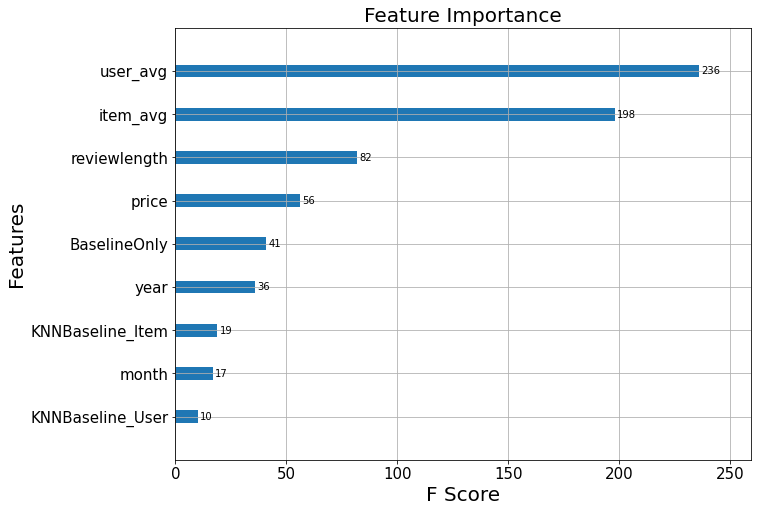

In [127]:
x_train = train_surprice.dropna().drop(["reviewerID", "asin", "overall"], axis = 1)

x_test = test_surprice.dropna().drop(["reviewerID", "asin", "overall"], axis = 1)

y_train = train_surprice.dropna().overall

y_test = test_surprice.dropna().overall

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL_KNN")

model_train_evaluation["XGB_BSL_KNN"] = train_result
model_test_evaluation["XGB_BSL_KNN"] = test_result

##Model with Pyspark ALS

In [27]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [32]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

^C


In [31]:
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

tar: spark-3.1.2-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [21]:
!pip install pyspark

     |████████████████████████████████| 212.4 MB 70 kB/s 
     |████████████████████████████████| 198 kB 37.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=2bf6fea6631c22130298cfcdbc37d09b1ecd5dfda39af82a2537316f8e84d611
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [24]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator# Create ALS model

In [26]:
als = ALS()

AttributeError: ignored